RIO
PSR
CLT
HOL
SDD
CJV2
ALP
RVR
DEC
CHF
OLI
LLS
SMF2
Epicentral distance [km]:  12184.065859999973
Theoretical azimuth [deg]:  345.9786096084387
Theoretical backazimuth [deg]:  13.884315410589346
45.9592 34.9109
 Magnitude:  Magnitude
	     resource_id: ResourceIdentifier(id="quakeml:earthquake.usgs.gov/product/origin/us2000bmcg/us/1517885130040/product.xml#magnitude")
	             mag: 7.3 [uncertainty=0.044]
	  magnitude_type: 'mww'
	       origin_id: ResourceIdentifier(id="quakeml:earthquake.usgs.gov/product/origin/us2000bmcg/us/1517885130040/product.xml")
	   station_count: 50
	 evaluation_mode: 'manual'
	   creation_info: CreationInfo(agency_id='us', creation_time=UTCDateTime(2018, 2, 6, 2, 45, 30, 40000))


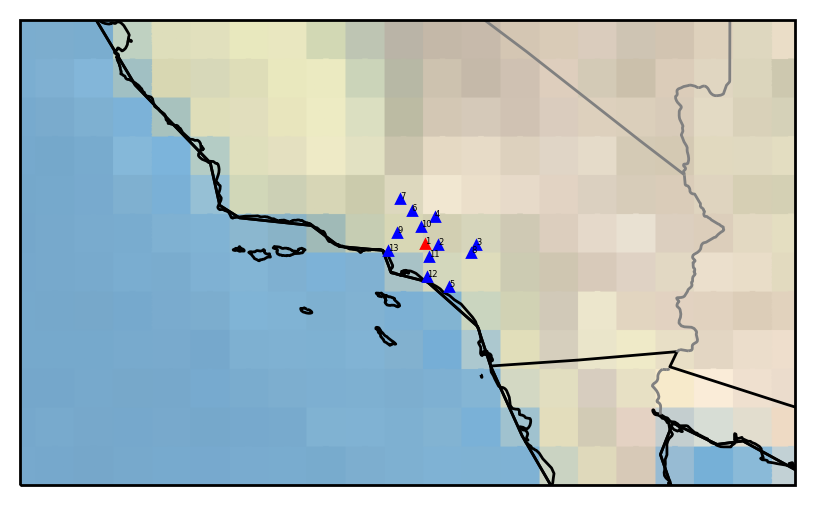

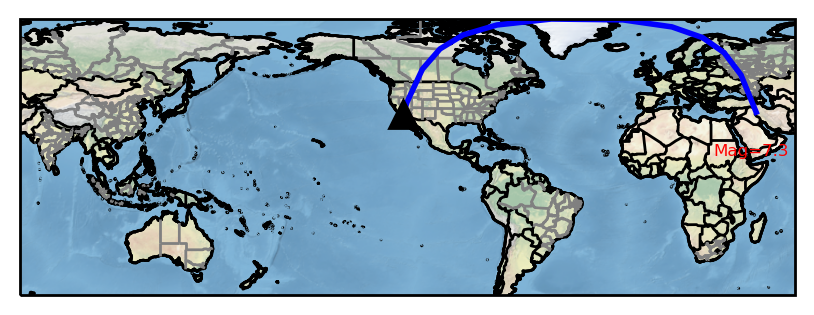

In [4]:
###### Imports (YOU MUST INSTALL OBSPY FIRST)

from obspy               import *
from obspy.clients        import fdsn
from obspy.clients.fdsn.header import URL_MAPPINGS
from matplotlib.colorbar import ColorbarBase
from matplotlib.colors   import Normalize
from obspy.geodetics.base       import gps2dist_azimuth
from obspy.geodetics import locations2degrees
from obspy.clients.fdsn    import Client
import os
import obspy.signal.array_analysis as AA
import matplotlib.pyplot           as plt
plt.rcParams["figure.figsize"] = (10,6)
import matplotlib.cm               as cm
import numpy                       as np
import scipy                       as sp
import scipy.odr                   as odr
import math
import obspy
from obspy.core.util.obspy_types import CustomComplex
from obspy.signal.rotate import rotate2zne
import warnings
warnings.filterwarnings("ignore")
#Events
from obspy import read_events
##### for map
import matplotlib.ticker as mticker
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
#import xlwt
#import xlrd
#####
fdsn_client = Client('IRIS')
# fdsn_client = Client('SCEDC')
s='../earthquake/quake7_2012_2022.xml'
catalog= read_events(s)
n1=67  # index
n0=29 # N event
event=catalog[n1]
ev_N=len(catalog)


# print(' Origin time: ',event.origins[0].time)
# print(' Latitude: ',event.origins[0].latitude)
# print(' Longitude: ',event.origins[0].longitude)
# print(' Depth: ',event.origins[0].depth)
# print(' Magnitude: ',event.magnitudes[0].mag)


starttime = event.origins[0].time


#PFO array information, misorientations for correction, array options
network = 'CI'
# array_stations =     ['DW01','DW02','DW03','DW04','DW05','DW06','DW07','DW08','DW09','DW10','DW11','DW12','DWRPT']
# array_stations = ['ABL','BSAP','BZN','CPE','CRY','CSLB','FRD','GARR','HSSP','KNW','LVA2','MONP2','MTRP','RDM','RRSP','SETM','SMER','SND','SOL','TMSP','TONN','TRAN','TRO','TUBB','USGCB']
# array_stations =['RA01','RA02','RA03','RA04','RA05','RA06','RA07','RA08','RA09','RA10','RA11','RA12']
# array_stations =['ADO','AGO','ALP','ARV','BAC','BAI','BAK','BAR',
#                  'BBR','BBS','BC3','BCW','BEL','BFS','BHP','BLA2',
#                 'BLC','BLY','BOM','BOR','BRE','BTP','BUE','CAC','CAR','CBC','CCA',
#                 'CCC','CFD','CFS','CFT','CGO','CHF','CHI','CHN']
# array_stations =['ADO','ARV','BAK','BAR',
#                  'BBR','BC3','BEL','BFS','CHF','DAN','DEC','DGR'
#                  ,'DJJ','EDW2','GLA','GMR','HEC','IKP','USC','VES','VOG','VTV','Q0002'] #N0

# array_stations=['CHF','EDW2','DEC','ADO','BFS','MWC','JNH2','VCS','CJV2','LRR2','RIO',
#                 'TA2','RUS','GR2','HLL','PDE','DTP','STS','SRN','CLT','SPF','BTP','WSS','MLS']  #N0
# array_stations=['SRT','WBM','TOW2','LRL','CLC','CCC','WRC2','WCS2','WMF','MPM','SLA','WBS','WOR','ISA','DTP']  #N1
# array_stations=['IDO','PMD','KYV','PSD','DEV','CTW','BEL','MCT','HAY','GMA','SLB','RCR','DNR','BOR','TOR','BLA2','MSJ','BC3','THM']  #N2
# array_stations=['MPP','SYP','BCW','CAR','SMW']

array_stations=['LGB','WLT','RIO','LTP','DLA','OLI','PSR','MWC','GR2','LCG','PDR','SMF2','LAF','STS','RPV','LLS','DEC','CJV2',
                'CHF','CIA','SDD','MLS','WSS','BLC','BFS','PLS','TA2','SVD','CLT','CJM','RVR','ADO','ALP','HOL','MNO']


##########################
array_station=[]

# array=range(len(array_stations)) #optimal


# array=[9,8,14,1,11] #N0
array=[3,7,29,34,21,18,33,31,17,19,6,16,12] #N0 26 11 2 24 4,5, 25,23,20,15     ,19,18,17 23 28
# 25 21 30
# array=[1,5,6,7,11,13,3,15,8,10,4,2,12,9] #N1 14,

# array=[1,6,13,10,4,3,11,8,7,14,15,16,9] #N2 


array[:] = [number - 1 for number in array]
# Setting up array coordinates, defining frequency range
for i in array:
    array_station.append(array_stations[i])
    

subarray = range(0,len(array_station))


bpf=True
channel_resp='BHZ'
debug=True
#################
central_longitude0=-116.2
plt.figure(dpi=200,figsize=(5, 5))
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=central_longitude0))
# ax.set_extent([20, -120, 0, 80]) 
# ax.set_ylim([0, 80])
ax.set_extent([90, -90, -90, 90])
ax.set_ylim([31, 37])
ax.set_xlim([-7, 3])

ax.coastlines(resolution='10m')
ax.stock_img()
ax.coastlines()
ax.add_feature(cfeature.BORDERS)
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.COASTLINE)
states_provinces = cfeature.NaturalEarthFeature(
    category='cultural',
    name='admin_1_states_provinces_lines',
    scale='10m',
    facecolor='none')
ax.add_feature(states_provinces, edgecolor='gray')

gl = ax.gridlines(crs=ccrs.PlateCarree(), 
                  draw_labels=True, linewidth=2, color='gray', alpha=0.5, linestyle='--') 


gl.xlabels_top = False
gl.xlabels_bottom = False
gl.ylabels_left = False
gl.ylabels_right = False

gl.xlines = False
gl.ylines = False
#create relative distance of array
#create relative distance of array
coo = []
first=True
num=0
for station in array_station:
    num=num+1
#     if num==4:
#         network='PY'
#         fdsn_client = Client('IRIS')
#     else:
#         network='CI'
#         fdsn_client = Client('SCEDC')
    print(station)
    inven =  fdsn_client.get_stations(network=network,station=station,starttime=starttime,endtime=starttime+8) 
    net = inven[0]
    lat = net[0].latitude
    lon = net[0].longitude
    height = net[0].elevation
   
    #print(lat,lon)
    if first:
        first = False 
        o_lon = lon
        o_lat = lat
        o_height = height
    lon_0,lat_0 = obspy.signal.util.util_geo_km(o_lon,o_lat,lon,lat)  
    coo.append([lon_0*1000,lat_0*1000,height-o_height])  #convert unit from km to m
    if num==1:
        ax.plot(lon,lat,'r^',markersize=3,transform=ccrs.Geodetic())
        ax.text(lon,lat,'%d'%(num),transform=ccrs.Geodetic(),fontsize=3)
    else:
        ax.plot(lon,lat,'b^',markersize=3,transform=ccrs.Geodetic())
        ax.text(lon,lat,'%d'%(num),transform=ccrs.Geodetic(),fontsize=3)
#     print(lon_0,lat_0);
    

###############################

#print(coo) 

source_latitude = event.origins[0].latitude
source_longitude = event.origins[0].longitude

# station location (PFO)
station_latitude = o_lat
station_longitude = o_lon

# theoretical backazimuth and distance
baz = gps2dist_azimuth(source_latitude, source_longitude, station_latitude, station_longitude)

print('Epicentral distance [km]: ', baz[0]/1000)
print('Theoretical azimuth [deg]: ', baz[1])
print('Theoretical backazimuth [deg]: ', baz[2])
########################
# plt.rcParams['figure.dpi'] = 400
central_longitude0=-116
plt.figure(dpi=200,figsize=(5, 5))
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=central_longitude0))
# ax.set_extent([20, -120, 0, 80]) 
# ax.set_ylim([0, 80])
ax.set_extent([90, -90, -90, 90])
ax.set_ylim([-50, 78])
ax.set_xlim([-180, 180])


ax.coastlines(resolution='50m')
ax.stock_img()
ax.coastlines()
ax.add_feature(cfeature.BORDERS)
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.COASTLINE)
states_provinces = cfeature.NaturalEarthFeature(
    category='cultural',
    name='admin_1_states_provinces_lines',
    scale='50m',
    facecolor='none')
ax.add_feature(states_provinces, edgecolor='gray')

gl = ax.gridlines(crs=ccrs.PlateCarree(), 
                  draw_labels=True, linewidth=2, color='gray', alpha=0.5, linestyle='--') 


gl.xlabels_top = False
gl.xlabels_bottom = False
gl.ylabels_left = False
gl.ylabels_right = False

gl.xlines = False
gl.ylines = False
# gl.xlocator = mticker.FixedLocator([120,140,160,180,-160,-140,-120,-100,-80])
# gl.xformatter = LONGITUDE_FORMATTER
# gl.yformatter = LATITUDE_FORMATTER
# gl.xlabel_style = {'size': 15, 'color': 'gray'}
# gl.xlabel_style = {'color': 'red', 'weight': 'bold'}


ff_lat=o_lat
ff_lon=o_lon
to_lon=event.origins[0].longitude
to_lat=event.origins[0].latitude
ax.plot([to_lon, ff_lon], [to_lat, ff_lat], c='b', lw=2,
        transform=ccrs.Geodetic())

print(to_lon,to_lat)
ax.text(to_lon-20,to_lat-20,'Mag=%.1f'%(event.magnitudes[0].mag),transform=ccrs.Geodetic(),fontsize=6,c='r')
# print(ff_lon,ff_lat)


## plot station and earthquake
ax.plot(ff_lon,ff_lat,'k^',markersize=10,transform=ccrs.Geodetic())
lon,lat = obspy.signal.util.util_geo_km(o_lon,o_lat,to_lon,to_lat)  

print(' Magnitude: ',event.magnitudes[0])




############### write excel #######################################
# wb = xlwt.Workbook()

# # 新增两个表单页
# sh1 = wb.add_sheet('event')

# # 然后按照位置来添加数据,第一个参数是行，第二个参数是列
# # 写入第一个sheet
# sh1.write(0, 0,'station position')
# sh1.write(0, 1,'lon')
# sh1.write(0, 2,float(ff_lon))
# sh1.write(0, 3,'lat')
# sh1.write(0, 4,float(ff_lat))

# sh1.write(0, 5,'backazimuth')
# sh1.write(0, 6,float(baz[2]))

# sh1.write(1, 0,int(n1))
# sh1.write(1, 1,str(s))

# sh1.write(2, 0,'Time')
# sh1.write(3, 0, 'Lon')
# sh1.write(4, 0, 'Lat')
# sh1.write(5, 0, 'mag')
# sh1.write(6, 0, 'depth')

# sh1.write(2, 1,str(event.origins[0].time))
# sh1.write(3, 1, float(event.origins[0].latitude))
# sh1.write(4, 1, float(event.origins[0].longitude))
# sh1.write(5, 1, float(event.magnitudes[0].mag))
# sh1.write(6, 1, float(event.origins[0].depth))

# # 最后保存文件即可
# s0='events'+str(n0)+'.xls'
# wb.save(s0);

########## read excel ############################
# s0='events'+str(n0)+'.xls'
# wb = xlrd.open_workbook(s0)
# print( "sheet 数量:", wb.nsheets)
# print( "sheet 名称:", wb.sheet_names())

# # 根据 sheet 索引获取内容
# sh1 = wb.sheet_by_index(0)
# # 或者
# # 也可根据 sheet 名称获取内容
# # sh = wb.sheet_by_name('成绩')

# # 获取并打印该 sheet 行数和列数
# print( u"sheet %s  %d row %d col" % (sh1.name, sh1.nrows, sh1.ncols))

# # 获取并打印某个单元格的值
# print( "第一行第二列的值为:", sh1.cell_value(2, 1))
# print(type(sh1.cell_value(2, 1)))
# # 获取整行或整列的值
# rows = sh1.row_values(0) # 获取第一行内容
# cols = sh1.col_values(1) # 获取第二列内容

# # 打印获取的行列值
# print( "第一行的值为:", rows)
# print( "第二列的值为:", cols)

# # 获取单元格内容的数据类型
# print( "第二行第一列的值类型为:", sh1.cell(1, 0).ctype)

# # 遍历所有表单内容
# for sh in wb.sheets():
#     for r in range(sh.nrows):
#         # 输出指定行
#         print( sh.row(r))



In [5]:
plt.figure(figsize=(5, 5))
for i in range(0,len(array)):
#     plt.subplot(2,1,1)
    plt.plot(coo[i][0]/1000,coo[i][1]/1000,'b^',markersize=10)
#     plt.subplot(2,1,2)
#     plt.plot(i,np.sqrt(coo[i][0]**2+coo[i][1]**2),'ko')
# plt.subplot(2,1,1)
plt.plot(coo[0][0],coo[0][1],'r^',markersize=10)
plt.text(coo[0][0]-50,coo[0][1]+5,'Central Station',fontsize=10)
plt.xlabel('X(km)',fontsize=12)

plt.ylabel('Y(km)',fontsize=12)
# plt.set_xlabel(fontsize=18,labelpad = 12.5)
plt.xlim(-90,90)
plt.ylim(-90,90)




IndexError: list index out of range

<Figure size 360x360 with 0 Axes>

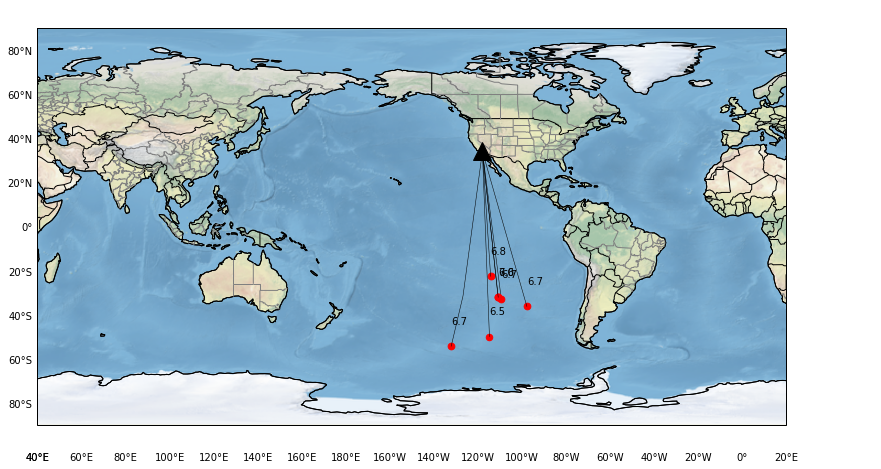

In [77]:
########## read excel ############################
lon_event=[]
lat_event=[]
magn=[]
#for n0 in range(1,30):
#    s0='events'+str(n0)+'.xls'
#    wb = xlrd.open_workbook(s0)
# print( "sheet 数量:", wb.nsheets)
# print( "sheet 名称:", wb.sheet_names())

# # 根据 sheet 索引获取内容
#    sh1 = wb.sheet_by_index(0)
# # 或者
# # 也可根据 sheet 名称获取内容
# # sh = wb.sheet_by_name('成绩')

# # 获取并打印该 sheet 行数和列数
# print( u"sheet %s  %d row %d col" % (sh1.name, sh1.nrows, sh1.ncols))

    # # 获取并打印某个单元格的值
#     print(n0)
#     print(sh1.cell_value(4, 1))
 #   lon_event.append(sh1.cell_value(4, 1))
 #   lat_event.append(sh1.cell_value(3, 1))
 #   magn.append(sh1.cell_value(5, 1))
#     print( "第一行第二列的值为:", sh1.cell_value(2, 1))
# print(type(sh1.cell_value(2, 1)))
# # 获取整行或整列的值
# rows = sh1.row_values(0) # 获取第一行内容
# cols = sh1.col_values(1) # 获取第二列内容

# # 打印获取的行列值
# print( "第一行的值为:", rows)
# print( "第二列的值为:", cols)

# # 获取单元格内容的数据类型
# print( "第二行第一列的值类型为:", sh1.cell(1, 0).ctype)

# # 遍历所有表单内容
# for sh in wb.sheets():
#     for r in range(sh.nrows):
#         # 输出指定行
#         print( sh.row(r))
####################
central_longitude0=-160
plt.figure(figsize=(15, 15))
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=central_longitude0))
# ax.set_extent([20, -120, 0, 80]) 
# ax.set_ylim([0, 80])
ax.set_extent([90, -90, -90, 90])
ax.set_ylim([-100, 100])
ax.set_xlim([-160, 220])

# ax.coastlines(resolution='11m').

ax.stock_img()
ax.coastlines()
ax.add_feature(cfeature.BORDERS)
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.COASTLINE)
states_provinces = cfeature.NaturalEarthFeature(
    category='cultural',
    name='admin_1_states_provinces_lines',
    scale='50m',
    facecolor='none')
ax.add_feature(states_provinces, edgecolor='gray')

gl = ax.gridlines(crs=ccrs.PlateCarree(), 
                  draw_labels=True, linewidth=2, color='gray', alpha=0.5, linestyle='--') 


gl.xlabels_top = False
# gl.xlabels_bottom = False
gl.ylabels_right = False
gl.xlines = False
gl.ylines = False
gl.xlocator = mticker.FixedLocator([40,60,80,100,120,140,160,180,-160,-140,-120,-100,-80,-60,-40,-20,0,20,40])
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
# gl.xlabel_style = {'size': 15, 'color': 'gray'}
# gl.xlabel_style = {'color': 'red', 'weight': 'bold'}


ff_lat=o_lat
ff_lon=o_lon

# ax.plot([to_lon, ff_lon], [to_lat, ff_lat], c='b', lw=2,
#         transform=ccrs.PlateCarree())


## plot station and earthquake
ax.plot(ff_lon,ff_lat,'k^',markersize=18,transform=ccrs.Geodetic())

# s='../earthquake/quake7_2012_2022.xml'
s='../earthquake/quake_180_65.xml'

catalog= read_events(s)
ev_N=len(catalog)

for i in range(0,ev_N):
    to_lat=catalog[i].origins[0].latitude
    to_lon=catalog[i].origins[0].longitude
    ax.plot(to_lon,to_lat,'ro',markersize=catalog[i].magnitudes[0].mag,transform=ccrs.Geodetic())
    ax.text(to_lon,to_lat+10,'%.1f'%(catalog[i].magnitudes[0].mag),transform=ccrs.Geodetic())#catalog[i].magnitudes[0].mag
    ax.plot([to_lon, ff_lon], [to_lat, ff_lat], c='k', lw=0.5,
        transform=ccrs.Geodetic())

# to_lat=event.origins[0].latitude
# to_lon=event.origins[0].longitude
# ax.plot(to_lon,to_lat,'ro',markersize=catalog[i].magnitudes[0].mag,transform=ccrs.Geodetic())
# ax.plot([to_lon, ff_lon], [to_lat, ff_lat], c='r', lw=1,
#         transform=ccrs.Geodetic())

# s='./quakeright.xml'
# catalog= read_events(s)
# ev_N=len(catalog)
# for i in range(0,ev_N):
#     to_lat=catalog[i].origins[0].latitude
#     to_lon=catalog[i].origins[0].longitude
#     ax.plot(to_lon,to_lat,'ro',markersize=catalog[i].magnitudes[0].mag,transform=ccrs.Geodetic())
#     ax.text(to_lon,to_lat+10,'%.1f'%(catalog[i].magnitudes[0].mag),transform=ccrs.Geodetic())#catalog[i].magnitudes[0].mag
#     ax.plot([to_lon, ff_lon], [to_lat, ff_lat], c='k', lw=0.5,
#         transform=ccrs.Geodetic())


In [3]:
 s='../earthquake/quake7_2012_2022.xml'         
# s='../earthquake/quake11.xml'
# s='../earthquake/quake_180_65.xml'

catalog= read_events(s)
n1=111 # index
event=catalog[n1]
print(' Magnitude: ',event.magnitudes[0].mag)
starttime = event.origins[0].time+1500
t=starttime; e=t+2500 #daily data
###################################
source_latitude = event.origins[0].latitude
source_longitude = event.origins[0].longitude

# station location (PFO)
station_latitude = o_lat
station_longitude = o_lon

# theoretical backazimuth and distance
baz = gps2dist_azimuth(source_latitude, source_longitude, station_latitude, station_longitude)

print('Epicentral distance [km]: ', baz[0]/1000)
print('Theoretical azimuth [deg]: ', baz[1])
print('Theoretical backazimuth [deg]: ', baz[2])
###################################
# Single Event Data, collect array data for single event

# Start time, end time
# 2022-03-16 14:36:30 (UTC) M 7 in Japan
#starttime for data processing
#prefilt=(0.001, 0.006, 10, 20)
prefilt=(1./900, 1./800, 10, 20) #(Hz)

# 
# This section is important, here you determine the frequency range for the plots

# Original
#freq1=0.014   #0.014 for Spudich    and  0.073 for Langston
#freq2=1.5  
# fdsn_client = Client('IRIS')

fdsn_client = Client('SCEDC')

freq1=1./600 # Period (s)
freq2=1./70  # period (s)




print(t,e)
tsz = []
tsn = []
tse = []      
first = True
num=0
for station in array_station:
    num=num+1
#     if num==4:
#         network='PY'
#         fdsn_client = Client('IRIS')
#     else:
#         network='CI'
#         fdsn_client = Client('SCEDC')
#     print(station)
    mystream = fdsn_client.get_waveforms(network,station,'','BH*',t,e,attach_response=True)
    print(' '+station+'..done',num,len(array_station)) 
    mystream.sort()
    mystream.reverse() 
    mystream.remove_response(output="VEL",pre_filt=prefilt,taper=False,zero_mean=True)
#     print(mystream[0].data)
    mystream[0].data, mystream[1].data, mystream[2].data=rotate2zne(mystream[0],0,-90,mystream[1],0,0,mystream[2],90,0)    #correct mis-alignment
    mystream.filter('bandpass',freqmin=freq1,freqmax=freq2,corners=2,zerophase=True) if bpf == True else None
    if first:
        first = False
        
        print(' Initializing central station to acc')
        o_mystream=mystream.copy()     #information of the central station   
        acc = mystream.copy()
        acc.differentiate()          
    tsz.append(mystream[0].data)
    tsn.append(mystream[1].data)
    tse.append(mystream[2].data)  


print(' Array data retrieval is done...') 
print(' Plotting and checking data...') 



 Magnitude:  7.0
Epicentral distance [km]:  7367.531370490945
Theoretical azimuth [deg]:  353.4988846245885
Theoretical backazimuth [deg]:  173.3495043618524
2014-10-09T02:39:31.440000Z 2014-10-09T03:21:11.440000Z


KeyboardInterrupt: 

In [284]:
mystream = fdsn_client.get_waveforms(network,'SMF2','','BH*',t,e,attach_response=True)
print(mystream)


3 Trace(s) in Stream:
CI.SMF2..BHE | 2017-01-22T05:00:22.969500Z - 2017-01-22T05:42:02.944500Z | 40.0 Hz, 100000 samples
CI.SMF2..BHN | 2017-01-22T05:00:22.969500Z - 2017-01-22T05:42:02.969500Z | 40.0 Hz, 100001 samples
CI.SMF2..BHZ | 2017-01-22T05:00:22.969500Z - 2017-01-22T05:42:02.969500Z | 40.0 Hz, 100001 samples


(1.0, 2500.0)

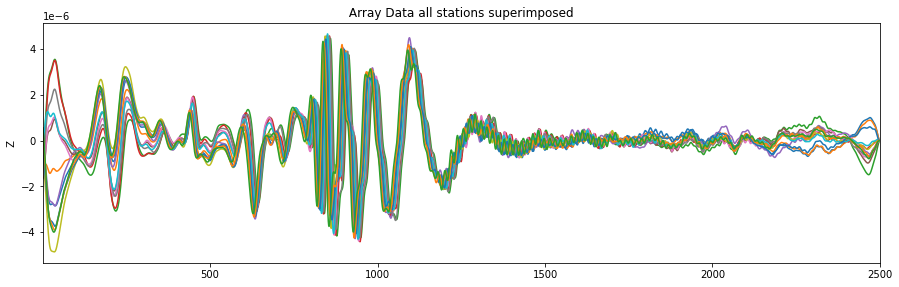

In [160]:

time = np.linspace(0,1./mystream[0].stats.sampling_rate*mystream[0].stats.npts,mystream[0].stats.npts)
tsz0=np.empty((len(array),len(time)))
tsn0=np.empty((len(array),len(time)))
tse0=np.empty((len(array),len(time)))


for j in range(0,len(array)):
#     print(j)
    for i in range(len(time)-1):
        tsz0[j][i]=tsz[j][i]
        tsn0[j][i]=tsn[j][i]
        tse0[j][i]=tse[j][i]



        
x1=1
x2=2500

plt.figure(figsize=(15,15))
ax=plt.subplot(311)
plt.plot(time,np.transpose(tsz0))


plt.title(' Array Data all stations superimposed ')
plt.ylabel(' Z ')
ax.set_xlim(x1,x2)
# ax=plt.subplot(312)
# plt.plot(time,acc[0].data)
# plt.ylabel(' N ')
# ax.set_xlim(x1,x2)


(6.0, 2500.0)

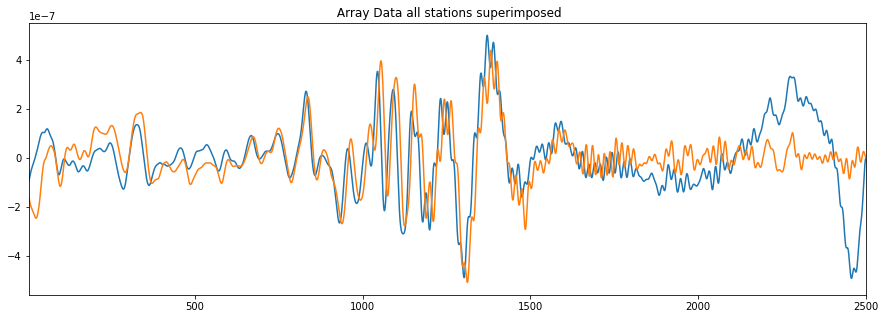

In [149]:
x1=6
x2=2500
plt.figure(figsize=(15,5))
plt.plot(time,np.transpose(tsz0[0:2][:]))


plt.title(' Array Data all stations superimposed')
plt.xlim(x1,x2)


In [395]:
# print(np.array(coo))
# coo1=coo.copy()
# coo1=np.array(coo1)

# x1=2
# x0=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19]

# coo2=np.empty(((len(x0)),3))
# for i in x0:
#     if (i-1)!=(x1-1):
#         print(i-1)
#         coo2[i-1][:]=coo1[i-1][:]
    
# print(test[1][2])





In [161]:
# Array derivation with PFO data

#perform array-derivation
print(' ADR is executing...')
ttse  =  np.array(tse0)
ttsn  =  np.array(tsn0)
ttsz  =  np.array(tsz0)
vp = 6264. #1700
vs = 3751. #1000
sigmau = 0.001 #0.001

# Call the ObsPy ADR routine 
result = AA.array_rotation_strain(np.array(subarray), np.transpose(ttse), np.transpose(ttsn), np.transpose(ttsz), vp, vs, np.array(coo), sigmau)


# Remap output
rotz = result['ts_w3']
rotn = result['ts_w2']
rote = result['ts_w1']

#(Rotation trace)
rot = o_mystream                  #information of the central station 
rot[0].data = rotz
rot[1].data = rotn
rot[2].data = rote
rot[0].stats.channel='BJZ'
rot[1].stats.channel='BJN'
rot[2].stats.channel='BJE'
      
print(' ADR is done ... takes time ...')


# Prepare rotation to RTZ 

# event location from event info
source_latitude = event.origins[0].latitude
source_longitude = event.origins[0].longitude

# station location (PFO)
station_latitude = o_lat
station_longitude = o_lon

# theoretical backazimuth and distance
baz = gps2dist_azimuth(source_latitude, source_longitude, station_latitude, station_longitude)

print('Epicentral distance [km]: ', baz[0]/1000)
print('Theoretical azimuth [deg]: ', baz[1])
print('Theoretical backazimuth [deg]: ', baz[2])


acc1=acc.copy()
rot1=rot.copy()
acc1.rotate(method='NE->RT',back_azimuth=baz[2])
rot1.rotate(method='NE->RT',back_azimuth=baz[2])

 ADR is executing...
 ADR is done ... takes time ...
Epicentral distance [km]:  9455.832064376757
Theoretical azimuth [deg]:  46.108014494218786
Theoretical backazimuth [deg]:  229.11262789007174


3 Trace(s) in Stream:
CI.RIO..BJZ | 2021-03-04T18:06:23.369500Z - 2021-03-04T18:48:03.369500Z | 40.0 Hz, 100001 samples
CI.RIO..BJR | 2021-03-04T18:06:23.369500Z - 2021-03-04T18:48:03.369500Z | 40.0 Hz, 100001 samples
CI.RIO..BJT | 2021-03-04T18:06:23.369500Z - 2021-03-04T18:48:03.369500Z | 40.0 Hz, 100001 samples

 After rotating to VRT


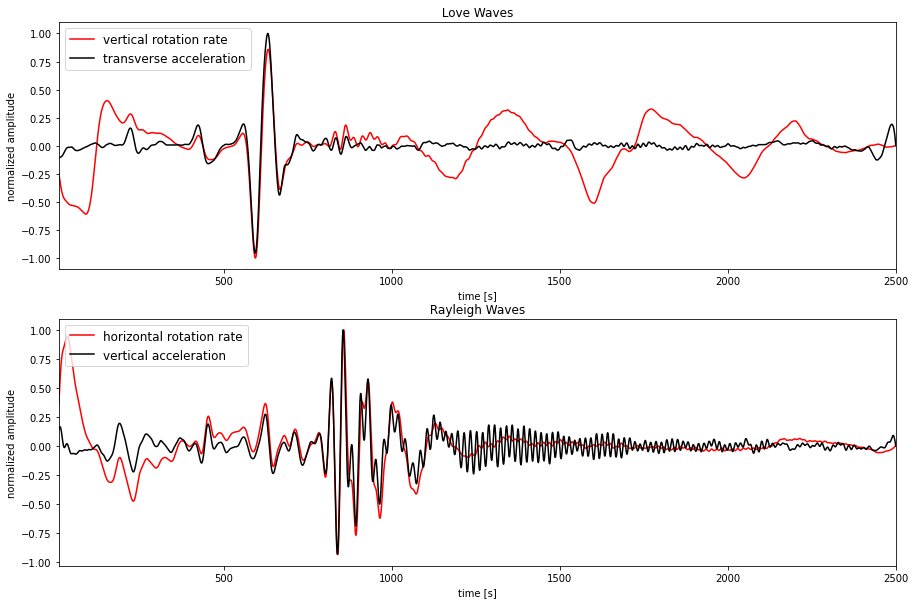

Epicentral distance [km]:  9455.832064376757
Theoretical azimuth [deg]:  46.108014494218786
Theoretical backazimuth [deg]:  229.11262789007174
Theoretical backazimuth [deg]:  229.11262789007174
25
               network: CI
               station: RIO
              location: 
               channel: BJZ
             starttime: 2021-03-04T18:06:23.369500Z
               endtime: 2021-03-04T18:48:03.369500Z
         sampling_rate: 40.0
                 delta: 0.025
                  npts: 100001
                 calib: 1.0
_fdsnws_dataselect_url: http://service.scedc.caltech.edu/fdsnws/dataselect/1/query
               _format: MSEED
                 mseed: AttribDict({'dataquality': 'D', 'number_of_records': 54, 'encoding': 'STEIM1', 'byteorder': '>', 'record_length': 4096, 'filesize': 663552})
            processing: ['ObsPy 1.2.2: trim(endtime=UTCDateTime(2021, 3, 4, 18, 48, 3, 369500)::fill_value=None::nearest_sample=True::pad=False::starttime=UTCDateTime(2021, 3, 4, 18, 6, 23, 36950

In [162]:
# Plotting ADR and original data

print(' After rotating to VRT')

scale=1e-6
scale1=1e-9


# plt.figure(2,figsize=(15,10))
# plt.subplot(211)
# plt.plot(rot1[0].times(), rot1[0].data/scale, 'k')
# plt.plot(rot1[1].times(), rot1[1].data/scale-1, 'k')
# plt.plot(rot1[2].times(), rot1[2].data/scale-2, 'k')
# plt.title(' Rot-Z(qL) Rot-R(null) Rot-T(qR)  ')



# plt.subplot(212)
# plt.plot(acc1[0].times(), acc1[0].data/scale1, 'k')
# plt.plot(acc1[1].times(), acc1[1].data/scale1-1, 'k')
# plt.plot(acc1[2].times(), acc1[2].data/scale1-2, 'k')
# plt.title(' Tra-Z(qR) Tra-R(qR) Tra-T(qL)  ')

# plt.xlabel(' Time (s) ')


plt.figure(figsize=(15,10))

x1=10
x2=2500


ax = plt.subplot(211)
ax.plot(rot1[0].times(), rot1[0].data/np.max(np.abs(rot1[0].data)), 'r', label='vertical rotation rate')
ax.plot(acc1[2].times(), acc1[2].data/np.max(np.abs(acc1[2].data)), 'k', label='transverse acceleration')
ax.legend(loc=2, prop={"size":12})

ax.set_xlabel('time [s]')
ax.set_ylabel('normalized amplitude')
ax.set_xlim(x1,x2)
ax.set_title(' Love Waves ')

ax = plt.subplot(212)
ax.plot(rot1[2].times(), rot1[2].data/np.max(np.abs(rot1[2].data)), 'r', label='horizontal rotation rate')
ax.plot(acc1[0].times(), -acc1[0].data/np.max(np.abs(acc1[0].data)), 'k', label='vertical acceleration')
ax.legend(loc=2, prop={"size":12})
ax.set_xlabel('time [s]')
ax.set_ylabel('normalized amplitude')
ax.set_xlim(x1,x2)

ax.set_title(' Rayleigh Waves ')

plt.show()
print('Epicentral distance [km]: ', baz[0]/1000)
print('Theoretical azimuth [deg]: ', baz[1])
print('Theoretical backazimuth [deg]: ', baz[2])

#####################################################


print('Theoretical backazimuth [deg]: ', baz[2])

print(n1)
from obspy import read
rot1[0].write('../data/Rot_z.mseed',format='MSEED')
rot1[1].write('../data/Rot_x.mseed',format='MSEED')
rot1[2].write('../data/Rot_y.mseed',format='MSEED')

acc1[0].write('../data/Tra_z.mseed',format='MSEED')
acc1[1].write('../data/Tra_x.mseed',format='MSEED')
acc1[2].write('../data/Tra_y.mseed',format='MSEED')
print(rot1[0].stats)